<a href="https://colab.research.google.com/github/AlexandrosMaragkakis/uni_ml_projects/blob/main/iris_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## Import libraries

In [211]:
import pandas as pd

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt

## Load the iris dataset

In [212]:
iris = datasets.load_iris()
#print(iris.DESCR)

## Print some information for the dataset

In [213]:
iris.data.shape
iris.target.shape
iris.target_names
iris.feature_names

print(f"Data shape: {iris.data.shape}")
print(f"Target shape: {iris.target.shape}")
print(f"Target names: {iris.target_names}")
print(f"Feature names: {iris.feature_names}")

Data shape: (150, 4)
Target shape: (150,)
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Load the data into a DataFrame 

In [214]:
# Set floating point precision
pd.set_option('display.precision', 2)

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add column with the target label
iris_df['species'] = [iris.target_names[i] for i in iris.target]

### Print the first 5 rows

In [215]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Print some descriptive statistics:

In [216]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### Descriptive statistics for the target column

In [217]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

## Plot the data using a pairplot
---
### From the pairplot we can guess that the features 'petal width' and 'petal length' will help the algorithms distinguish the 3 species more easily. The sepal features have similar distributions of values, so it is harder to distinguish any species.

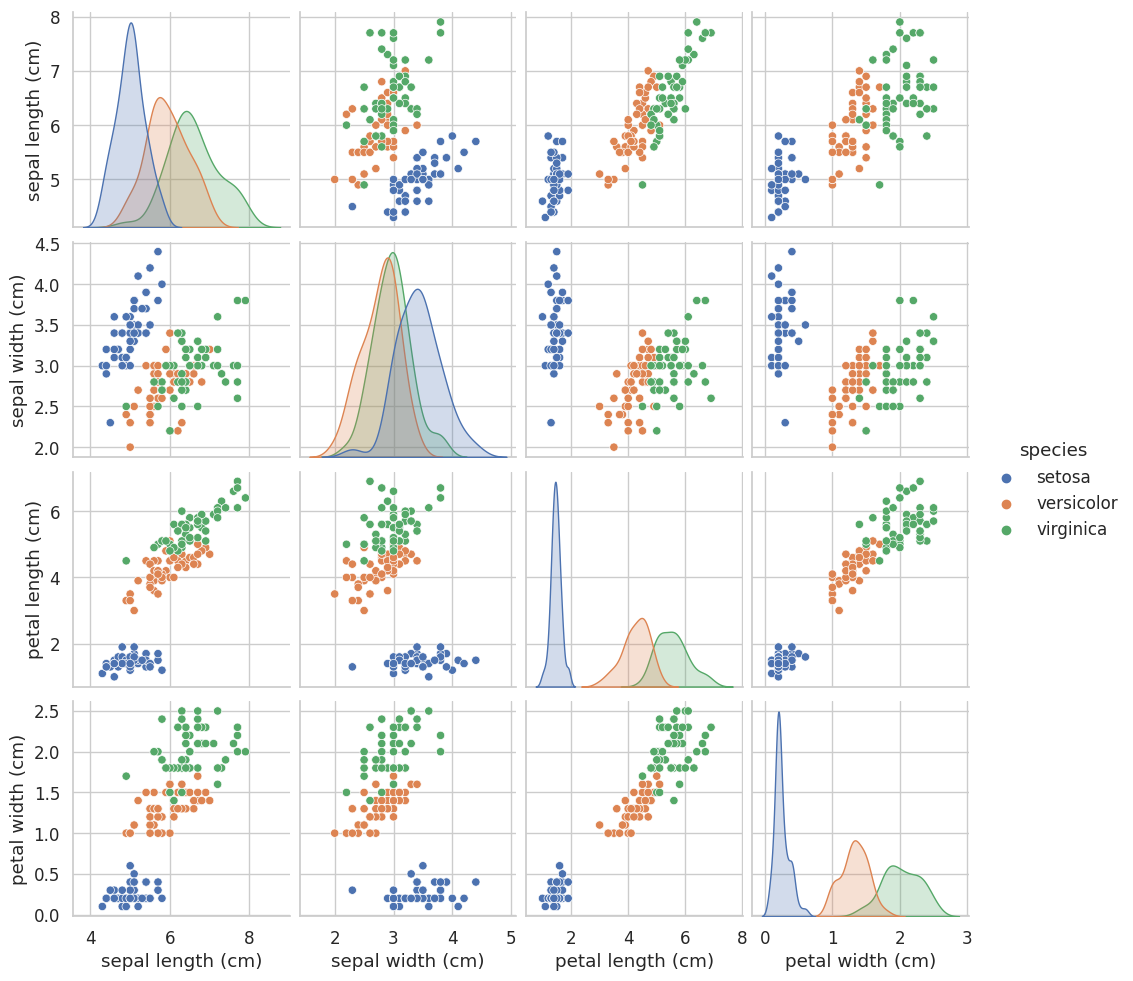

In [218]:
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4],
     hue='species')

## Classification using DecisionTreeClassifier, with criterion='entropy', which essentially is the algorithm C4.5 or J48, as explained by the [sklearn documentation](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart).
###We also test the quality of the model with the metrics Accuracy, Precision, Recall, F1 score. And because this is a multi-label problem, these metrics, except accuracy, need the parameter average=micro/macro/weighted/sample to be set. More on this [here](https://scikit-learn.org/stable/modules/model_evaluation.html#from-binary-to-multiclass-and-multilabel).

In [234]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=7)


tree1 = DecisionTreeClassifier(criterion='entropy')

tree1.fit(X=X_train, y=y_train)

y_pred = tree1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# precision recall and f1 produce different results each time
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
    
print('Results: ')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

Results: 
Accuracy: 0.8667
Precision: 0.8838
Recall: 0.8838
F1 score: 0.8838


## Visualizing the tree

[Text(0.4, 0.9, 'petal width (cm) <= 0.8\nentropy = 1.583\nsamples = 120\nvalue = [43, 38, 39]\nclass = setosa'),
 Text(0.2, 0.7, 'entropy = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = setosa'),
 Text(0.6, 0.7, 'petal width (cm) <= 1.7\nentropy = 1.0\nsamples = 77\nvalue = [0, 38, 39]\nclass = virginica'),
 Text(0.4, 0.5, 'petal length (cm) <= 5.0\nentropy = 0.286\nsamples = 40\nvalue = [0, 38, 2]\nclass = versicolor'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(0.6, 0.3, 'sepal length (cm) <= 6.05\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = virginica')]

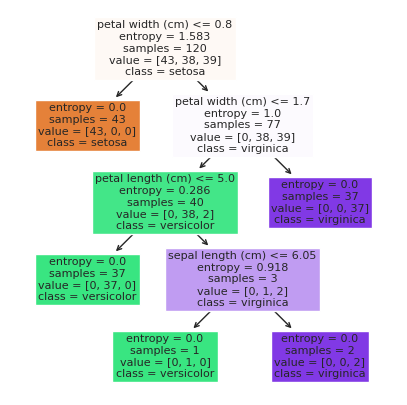

In [230]:
plt.figure(figsize=(5,5))
plot_tree(tree1, feature_names=iris.feature_names,  class_names=iris.target_names, filled=True)

## Print each feature's importance, as assigned from the algorithm

In [221]:
feature_importances1 = sorted(list(zip(tree1.feature_importances_, iris.feature_names)), reverse=True)
print(feature_importances1)

[(0.9396886213726594, 'petal width (cm)'), (0.045807814684843975, 'petal length (cm)'), (0.014503563942496644, 'sepal length (cm)'), (0.0, 'sepal width (cm)')]


### Visualize the feature importance using a barplot:

Text(0.5, 1.0, 'Feature Importance')

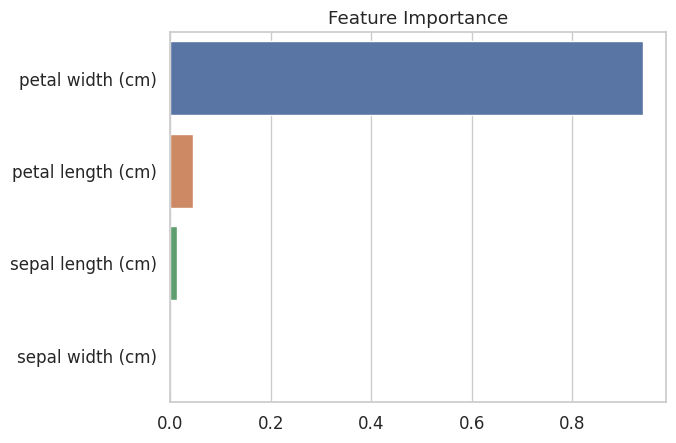

In [222]:
feature_importances = sorted(list(zip(tree1.feature_importances_, iris.feature_names)), reverse=True)
x = [f[0] for f in feature_importances1]
y_ = [f[1] for f in feature_importances1]

sns.barplot(x=x,y=y_)
plt.title('Feature Importance')

## Make a new dataset containing only the petal features

In [223]:
iris_df_no_sepal_width_or_length = iris_df.drop(['sepal width (cm)', 'sepal length (cm)','species'], axis=1)
iris_df_no_sepal_width_or_length

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## We are going to use the same process as previously

In [224]:
X, y = iris_df_no_sepal_width_or_length, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=7)


tree2 = DecisionTreeClassifier(criterion='entropy')

tree2.fit(X=X_train, y=y_train)

y_pred = tree2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# precision recall and f1 produce different results each time
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
    
print('Results: ')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

Results: 
Accuracy: 0.8667
Precision: 0.8838
Recall: 0.8838
F1 score: 0.8838


## Make a list with the petal features

In [225]:
less_features = list(iris.feature_names)
less_features.remove('sepal length (cm)')
less_features.remove('sepal width (cm)')
less_features

## Visualizing the new tree

[Text(0.4, 0.9, 'petal length (cm) <= 2.45\nentropy = 1.583\nsamples = 120\nvalue = [43, 38, 39]\nclass = setosa'),
 Text(0.2, 0.7, 'entropy = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = setosa'),
 Text(0.6, 0.7, 'petal width (cm) <= 1.7\nentropy = 1.0\nsamples = 77\nvalue = [0, 38, 39]\nclass = virginica'),
 Text(0.4, 0.5, 'petal length (cm) <= 5.0\nentropy = 0.286\nsamples = 40\nvalue = [0, 38, 2]\nclass = versicolor'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(0.6, 0.3, 'petal width (cm) <= 1.55\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = virginica')]

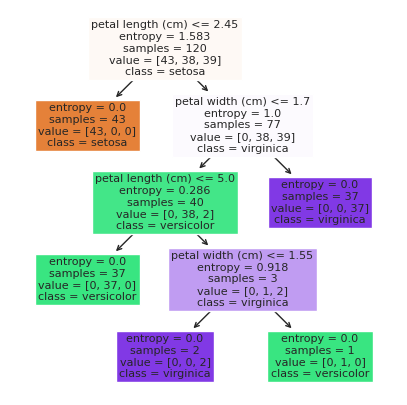

In [232]:
plt.figure(figsize=(5,5))
plot_tree(tree2, feature_names=less_features,  class_names=iris.target_names, filled=True)

### Visualize the feature importance using a barplot:

Text(0.5, 1.0, 'Feature Importance')

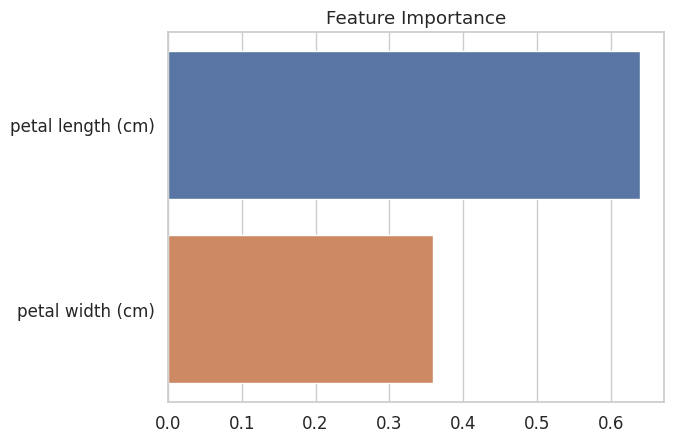

In [228]:
feature_importances2 = sorted(list(zip(tree2.feature_importances_, less_features)), reverse=True)
x = [f[0] for f in feature_importances2]
y_ = [f[1] for f in feature_importances2]

sns.barplot(x=x,y=y_)
plt.title('Feature Importance')

---

#### Decision trees are useful because we can easily interpret the decision-making process, mainly because we can visualize it as a tree. They also can perform feature selection, to optimize the results. 
#### On the other side, they might create very complex trees to fit outliers, which makes them perform poorly in general data. This problem is called "overfitting". Moreover, it is hard or even impossible to interpret the results in case the dataset is too large.
